# DATA DESCRIPTION

Let’s assume you are on a vacation in the United Kingdom with your friends. For fun, you decided to go to the Pubs nearby for some drinks. Google Map is down because of some issues.

While searching the internet, you came across https://www.getthedata.com/open-pubs. On this website, you found all the pub locations (Specifically Latitude and Longitude info). In order to impress your friends, you decided to create a web application with the data available in your hand.



- fsa_id: int-Food Standard Agency's ID for this pub.
- name:string-Name of the pub.
- address:string-Address fields separated by commas.
- postcode:string-Postcode of the pub.
- easting:int
- northing:int
- latitude:decimal
- longitude:decimal
- local_authority:string-Local authority this pub falls under.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('open_pubs.csv', names=['fsa_id','name','address','postcode','easting','northing','latitude','longitude','local_authority'])

In [3]:
df.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh


In [4]:
df.shape

(51331, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51331 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fsa_id           51331 non-null  int64 
 1   name             51331 non-null  object
 2   address          51331 non-null  object
 3   postcode         51331 non-null  object
 4   easting          51331 non-null  int64 
 5   northing         51331 non-null  int64 
 6   latitude         51331 non-null  object
 7   longitude        51331 non-null  object
 8   local_authority  51331 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

fsa_id             0
name               0
address            0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    0
dtype: int64

In [8]:
df.columns

Index(['fsa_id', 'name', 'address', 'postcode', 'easting', 'northing',
       'latitude', 'longitude', 'local_authority'],
      dtype='object')

In [9]:
df.longitude.value_counts()

\N           767
-0.655576     12
-1.853894     10
0.349896       9
-2.051721      8
            ... 
-2.734245      1
-2.735554      1
-2.733804      1
-2.735118      1
-3.050512      1
Name: longitude, Length: 46807, dtype: int64

In [10]:
df.latitude.value_counts()

\N           767
51.310946     10
52.896164     10
53.178189      9
55.318954      8
            ... 
53.369771      1
53.390799      1
53.371238      1
53.361078      1
53.076638      1
Name: latitude, Length: 46810, dtype: int64

In [12]:
df.replace('\\N',np.nan,inplace=True)

In [13]:
df.isnull().sum()

fsa_id               0
name                 0
address              0
postcode             0
easting              0
northing             0
latitude           767
longitude          767
local_authority      0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

fsa_id             0
name               0
address            0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    0
dtype: int64

In [16]:
df.latitude = df.latitude.astype(float)

In [17]:
df.longitude=df.longitude.astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50564 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fsa_id           50564 non-null  int64  
 1   name             50564 non-null  object 
 2   address          50564 non-null  object 
 3   postcode         50564 non-null  object 
 4   easting          50564 non-null  int64  
 5   northing         50564 non-null  int64  
 6   latitude         50564 non-null  float64
 7   longitude        50564 non-null  float64
 8   local_authority  50564 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.9+ MB


In [19]:
df.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
5,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh
6,102,Bristol Arms,"Bristol Hill, Shotley, IPSWICH",IP9 1PU,624624,233550,51.955042,1.267642,Babergh


In [20]:
df.local_authority.value_counts()

County Durham         680
Leeds                 611
Cornwall              557
Wiltshire             544
Kirklees              524
                     ... 
Orkney Islands         15
East Renfrewshire      12
Na h-Eileanan Siar     11
Isles of Scilly        10
West Lothian            2
Name: local_authority, Length: 360, dtype: int64

In [21]:
df.postcode.value_counts()

GU24 0NY    12
L2 6RE      11
ST14 8BD    10
CA1 1RP      9
PE25 1NJ     9
            ..
LA1 1RD      1
LA4 4TH      1
LA1 4XQ      1
LA1 4SA      1
LL11 5EA     1
Name: postcode, Length: 45231, dtype: int64

In [22]:
df.name.value_counts()

The Red Lion                      193
The Royal Oak                     170
Red Lion                          130
The Crown Inn                     112
Royal Oak                         102
                                 ... 
Old Hall Inn                        1
Morecambe Golf Club - Catering      1
Morecambe Golf Club                 1
Morecambe Cricket Club              1
Y Tai                               1
Name: name, Length: 35809, dtype: int64

<AxesSubplot:>

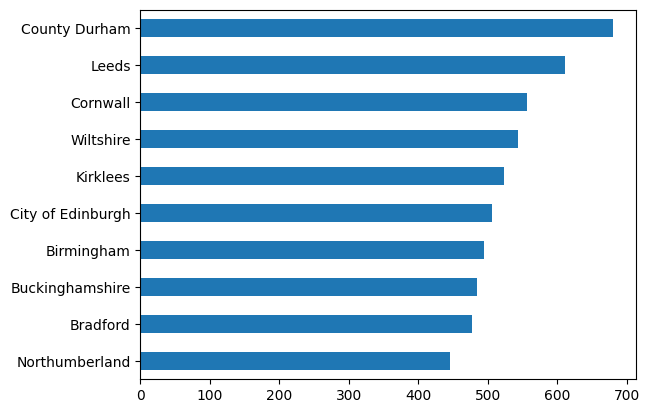

In [26]:
df.local_authority.value_counts().head(10).sort_values().plot(kind='barh')

In [28]:
df.head(50)

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
5,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh
6,102,Bristol Arms,"Bristol Hill, Shotley, IPSWICH",IP9 1PU,624624,233550,51.955042,1.267642,Babergh
7,122,Caffeine Lounge,"14 Borehamgate Shopping Precinct, King Street,...",CO10 2ED,587527,241247,52.037903,0.732687,Babergh
9,152,Chestnut Tree Farm,"3 Donald Mackintosh Way, Pinewood, IPSWICH",IP8 3LQ,612862,242887,52.043494,1.102543,Babergh
10,172,Cock & Bell,"Cock And Bell, Hall Street, Long Melford, SUDBURY",CO10 9JR,586264,245558,52.077053,0.716643,Babergh
11,254,Eight Bells Inn,"Eight Bells Public House, 90-92 Angel Street, ...",IP7 5DD,602934,242836,52.046763,0.957949,Babergh
12,273,Finezza pizza,"Eight Bells Public House, 90-92 Angel Street, ...",IP7 5DD,602934,242836,52.046763,0.957949,Babergh


In [32]:
pip install folium

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [33]:
import folium

In [43]:
import folium

# Create a map object with a starting location and zoom level
map = folium.Map(location=[52.076134,0.954382], zoom_start=10)

# Add a marker to the map
folium.Marker(location=[52.076134, 0.954382], tooltip='Open Pub', popup='Anchor Inn').add_to(map)

# Display the map
map


In [52]:
df.to_csv("resources\data\pub_cleaned.csv", index=False)

In [47]:
data

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh
4,102,Bristol Arms,"Bristol Hill, Shotley, IPSWICH",IP9 1PU,624624,233550,51.955042,1.267642,Babergh
...,...,...,...,...,...,...,...,...,...
50559,597119,Wrexham & District War Memorial Club Ltd,"Wrexham War Memorial Club Farndon Street, Wrex...",LL13 8DE,333909,350438,53.047100,-2.987319,Wrexham
50560,597127,Wrexham Lager Social Club,"1 - 3 Union Road, Wrexham, Wrexham",LL13 7SR,333028,350563,53.048123,-3.000485,Wrexham
50561,597130,Wrexham Rail Sports & Social Club,"Sports And Social Club, 44 Brook Street, Wrexh...",LL13 7LU,333259,350213,53.044998,-2.996966,Wrexham
50562,597131,Wrexham Rugby Club,"Wrexham Rugby Club Bryn Estyn Road, Wrexham, W...",LL13 9TY,335808,351078,53.053094,-2.959124,Wrexham
